<a href="https://colab.research.google.com/github/lisabortiz/Data-Science-Portfolio/blob/main/Project6/Project6_Images_To_Do_List_V02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Images – To Do List



Prior to starting this problem, be sure to enable the GPU runtime processing in your Jupyter notebook.



## Problem Definition



* Write a concise problem definition for the project. Put it in a text field at the top of your Jupyter notebook.

* Load necessary packages.



In [ ]:
import pandas as pd
import tensorflow.keras as keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense, Input, Flatten, Conv2D, MaxPooling2D
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from PIL import Image

In [ ]:
#Check the physical computing power
gpus = tf.config.experimental.list_physical_devices('GPU')

In [ ]:
len(gpus)

1

In [ ]:
#Limit GPU Memory Consumption Growth to avoid OOM errors
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
#OR You can disable GPU in Runtime Settings > Change Runtime Type to CPU
#Check to see if the GPU is still enabled
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Data Collection



* Load pickled data from X.pickle and y.pickle from the AWS S3 bucket.



In [ ]:
#Import images from X.pickle file
images_url = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/X.pickle"
images_url


'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/X.pickle'

In [ ]:
#Identify type of file
image_array = pd.read_pickle( images_url )
type(image_array)


numpy.ndarray

In [ ]:
#look at shape of image array
image_array.shape

(24946, 100, 100, 1)

In [ ]:
#Import image results from y.pickle file
target_url = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/y.pickle"
target_url

'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/y.pickle'

In [ ]:
#Identify the file type of target / results
target = pd.read_pickle( target_url )
type(target)


list

## Initial Data Exploring

In [ ]:
image_array.shape

(24946, 100, 100, 1)

In [ ]:
# np.unique(image_array)

In [ ]:
# np.unique_counts(image_array)

In [ ]:
print(len(target))

24946


In [ ]:
print(len(target) // 2 + 1 )

12474


In [ ]:
set(target)

{0, 1}

## Data Cleaning



* Scale the values in X so that they fall between 0 and 1 by dividing by 255.



In [ ]:
#Largest value within image array was 225, so scale images
scaled_imgs = image_array / 255
np.unique_counts(scaled_imgs)

UniqueCountsResult(values=array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.01568627,
       0.01960784, 0.02352941, 0.02745098, 0.03137255, 0.03529412,
       0.03921569, 0.04313725, 0.04705882, 0.05098039, 0.05490196,
       0.05882353, 0.0627451 , 0.06666667, 0.07058824, 0.0745098 ,
       0.07843137, 0.08235294, 0.08627451, 0.09019608, 0.09411765,
       0.09803922, 0.10196078, 0.10588235, 0.10980392, 0.11372549,
       0.11764706, 0.12156863, 0.1254902 , 0.12941176, 0.13333333,
       0.1372549 , 0.14117647, 0.14509804, 0.14901961, 0.15294118,
       0.15686275, 0.16078431, 0.16470588, 0.16862745, 0.17254902,
       0.17647059, 0.18039216, 0.18431373, 0.18823529, 0.19215686,
       0.19607843, 0.2       , 0.20392157, 0.20784314, 0.21176471,
       0.21568627, 0.21960784, 0.22352941, 0.22745098, 0.23137255,
       0.23529412, 0.23921569, 0.24313725, 0.24705882, 0.25098039,
       0.25490196, 0.25882353, 0.2627451 , 0.26666667, 0.27058824,
       0.2745098 , 0.27843137, 0.282

## Exploratory Data Analysis



* Look at the shape of X and y. Ensure that X is 4 dimensional.

* Plot a few ( >5 ) of the images in X using `plt.imshow()`.

* Look at the response values in y for those images.

* Hint: you may want to start with a random subset to get familiar with the process of building a NN.  Then go through the process again with the full set.



In [ ]:
#Looking at shape of scale_imgs(X)
scaled_imgs.shape


(24946, 100, 100, 1)

In [ ]:
#Create a random sample of image numbers
sample_idx = np.random.choice(scaled_imgs.shape[0], size=10000, replace=False)

In [ ]:
imgs_random = scaled_imgs[sample_idx]
imgs_random.shape

(10000, 100, 100, 1)

In [ ]:
#Convert target list into array, and then match sample # of indexes to the random sample of selected images
target_random = np.array(target)
target_random = target_random[sample_idx]
ncats = (target_random==1).sum()
ndogs = (target_random==0).sum()


In [ ]:
print(f'Number of Cats: {ncats:^10} Number of Dogs: {ndogs:^10}')

Number of Cats:    4986    Number of Dogs:    5014   


In [ ]:
imgs_random[0].shape
#random_imgs[0].reshape([80,80])

(100, 100, 1)

In [ ]:
# #Plot images within sample range to view data for errors and discrepancies
# for img, tar, idx in zip(imgs_random, target_random, sample_idx):
#   plt.imshow((img), cmap = plt.cm.gray)
#   plt.show()
# #Label for the image plot
#   if tar == 0:
#     print('dog', tar, idx)
#   else:
#     print('cat', tar, idx)



## Data Processing



* Split X and y into training and testing sets.

*  Build a convolutional neural network with the following:
  * Sequential layers
  * At least two 2D convolutional layers using the 'relu' activation function and a (3,3) kernel size.
  * A MaxPooling2D layer after each 2D convolutional layer that has a pool size of (2,2).
  * A dense output layer using the 'sigmoid' activation function.
  Note: you can play around with the number of layers and nodes to try to get better performance.

* Compile your model. Use the 'adam' optimizer. Determine which loss function and metric is most appropriate for this problem.

* Fit your model using the training set.

* Evaluate your model using the testing set.

* Plot the distribution of probabilities for the testing set.

* Define a function that will read in a new image and convert it to a 4 dimensional array of pixels (ask the instructor for help with this). Hint: [numpy.reshape]( https://numpy.org/doc/stable/reference/generated/numpy.reshape.html )

* Use the function defined above to read in the dog.jpg image that is saved in the AWS S3 bucket.

* Use the neural network you created to predict whether the image is a dog or a cat.



In [ ]:
#Define X, y, from data sets provided
X = imgs_random
y = target_random

In [ ]:
imgs_random.max()

np.float64(1.0)

In [ ]:
#Split into X and y test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)
# X_train, X_test, y_train, y_test
ncatstrain = (y_train==1).sum()
ndogstrain = (y_train==0).sum()
ncatstest = (y_test==1).sum()
ndogstest = (y_test==0).sum()
print(f'Number of Cats in Training Set: {ncatstrain:^10} Number of Dogs in Training Set: {ndogstrain:^10}')
print(f'Number of Cats in Test Set: {ncatstest:^10} Number of Dogs in Test Set: {ndogstest:^10}')

Number of Cats in Training Set:    3989    Number of Dogs in Training Set:    4011   
Number of Cats in Test Set:    997     Number of Dogs in Test Set:    1003   


In [ ]:
#View the type of data
(
  type(X_train),
  type(y_train),
  type(X_test),
  type(y_test)
)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [ ]:
#View the shape of data
(
  X_train.shape,
  y_train.shape,
  X_test.shape,
  y_test.shape
)


((8000, 100, 100, 1), (8000,), (2000, 100, 100, 1), (2000,))

In [ ]:
X_train.shape

(8000, 100, 100, 1)

In [ ]:
X_train.shape[1:]

(100, 100, 1)

In [ ]:
# X_train[0]

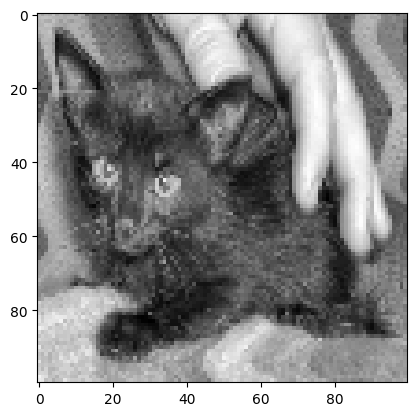

np.int64(1)

In [ ]:
#Plot an example from training set prior to normalization
plt.imshow( X_train[0], cmap = plt.cm.gray )
plt.show()
y_train[0]

In [ ]:
# View before normalization
X_train[0][10, :10]

array([[0.43137255],
       [0.47058824],
       [0.68627451],
       [0.69411765],
       [0.56862745],
       [0.1254902 ],
       [0.15294118],
       [0.18039216],
       [0.21568627],
       [0.18039216]])

In [ ]:
# - REMOVED - did not need both scaling methods.  It produced better results without it.
# Normalize the X training and test sets
# X_train = tf.keras.utils.normalize(X_train, axis=1)
# X_test = tf.keras.utils.normalize(X_test, axis=1)

In [ ]:
X_train.min(), X_train.max()

(np.float64(0.0), np.float64(1.0))

In [ ]:
X_train[0][10, :10]

array([[0.43137255],
       [0.47058824],
       [0.68627451],
       [0.69411765],
       [0.56862745],
       [0.1254902 ],
       [0.15294118],
       [0.18039216],
       [0.21568627],
       [0.18039216]])

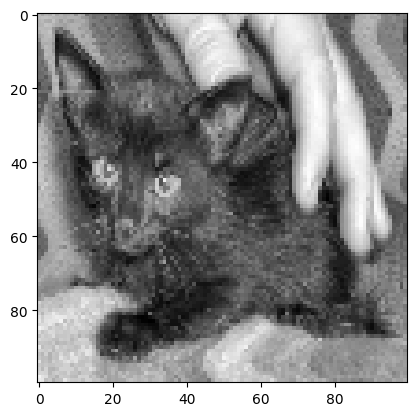

In [ ]:
# View the changes to plot after normalizing
plt.imshow(X_train[0],cmap=plt.cm.gray)
plt.show()

In [ ]:
X_train.shape


(8000, 100, 100, 1)

### Model Creation

In [ ]:
#CNN
model = Sequential()
# Define input layer
model.add(
  Input(
    shape=X_train.shape[1:],
    name="model_input",
  ),
)
# Define first hidden layer
model.add(
  Conv2D(
    name = "Conv1",
    filters = 64,
    kernel_size = (3,3),
    activation = 'relu',
  )
)

model.add(
    MaxPooling2D(pool_size=(2,2))
)

# Define second hidden layer
model.add(
  Conv2D(
    name = "Conv2",
    filters = 64,
    kernel_size = (3,3),
    activation = 'relu',
  )
)

model.add(
  MaxPooling2D(pool_size=(2,2))
)

# Flatten data to be used in output layer
model.add(
    Flatten()
)

# Define output layer
model.add(
  Dense(
    name = "output",
    units = 1,
    activation = 'sigmoid',
  )
)


In [ ]:
model.compile(
  optimizer = 'adam',
  loss = 'binary_crossentropy',
  #metrics = ['accuracy']
  metrics =   [keras.metrics.BinaryAccuracy(name="binary_accuracy", dtype=None, threshold=0.5)]
)

In [ ]:
history = model.fit(X_train, y_train, epochs=1000, batch_size=100,
                    validation_data=(X_test, y_test)) ;

Epoch 1/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - binary_accuracy: 0.5249 - loss: 0.6876 - val_binary_accuracy: 0.6130 - val_loss: 0.6371
Epoch 2/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - binary_accuracy: 0.6847 - loss: 0.6051 - val_binary_accuracy: 0.7055 - val_loss: 0.5631
Epoch 3/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - binary_accuracy: 0.7153 - loss: 0.5556 - val_binary_accuracy: 0.7070 - val_loss: 0.5693
Epoch 4/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - binary_accuracy: 0.7513 - loss: 0.5082 - val_binary_accuracy: 0.7255 - val_loss: 0.5492
Epoch 5/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - binary_accuracy: 0.7854 - loss: 0.4603 - val_binary_accuracy: 0.7565 - val_loss: 0.5053
Epoch 6/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - binary_accuracy: 0.8008 - loss: 0.4350 - val_binary_accuracy: 0.7645 - val_loss: 0.5033
Epoch 7/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - binary_accuracy: 0.8251 - loss: 0.3897 - val_binary_accuracy: 0.7515 - val_loss: 0.5149

In [ ]:
#model.fit(X_train, y_train, epochs=8, batch_size=8,
#                     validation_data=(X_test, y_test)) ;

In [ ]:
#history.history["binary_accuracy"] = bin_acc[0:11]
#history.history

In [ ]:
#bin_acc.extend(model.history.history['binary_accuracy'])


NameError: name 'bin_acc' is not defined

In [ ]:
#bin_acc

NameError: name 'bin_acc' is not defined

In [ ]:
model.history.history

{'binary_accuracy': [0.5646250247955322,
  0.6884999871253967,
  0.7247499823570251,
  0.7528749704360962,
  0.781624972820282,
  0.8061249852180481,
  0.8203750252723694,
  0.8360000252723694,
  0.8573750257492065,
  0.8728749752044678,
  0.8807500004768372,
  0.8887500166893005,
  0.909250020980835,
  0.9153749942779541,
  0.9292500019073486,
  0.9319999814033508,
  0.9496250152587891,
  0.9573749899864197,
  0.9620000123977661,
  0.9706249833106995,
  0.9745000004768372,
  0.9787499904632568,
  0.9865000247955322,
  0.9872499704360962,
  0.9923750162124634,
  0.9958750009536743,
  0.996874988079071,
  0.9980000257492065,
  0.9982500076293945,
  0.9988750219345093,
  0.999625027179718,
  1.0,
  0.999875009059906,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                  │ (None, 98, 98, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2 (Conv2D)                  │ (None, 47, 47, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │        33,857 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 214,277 (837.02 KB)

 Trainable params: 71,425 (279.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 142,852 (558.02 KB)

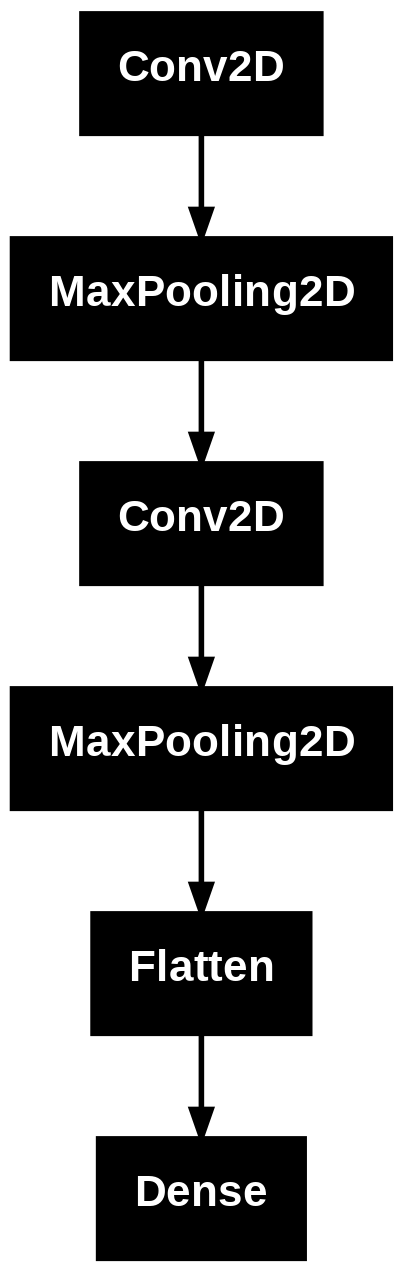

In [ ]:
plot_model(model)

In [ ]:
val_loss, val_acc = model.evaluate(X_test, y_test)
val_acc

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - binary_accuracy: 0.7591 - loss: 5.4733


0.7404999732971191

In [ ]:
predictions = model.predict(X_test)
print(predictions[39])

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
[5.670333e-24]


In [ ]:
predictions.shape

(2000, 1)

In [ ]:
[ print(f"{k}: {X:.2f}") for k, X in enumerate(predictions[19]*100) ]

0: 0.00


[None]

## Visualization


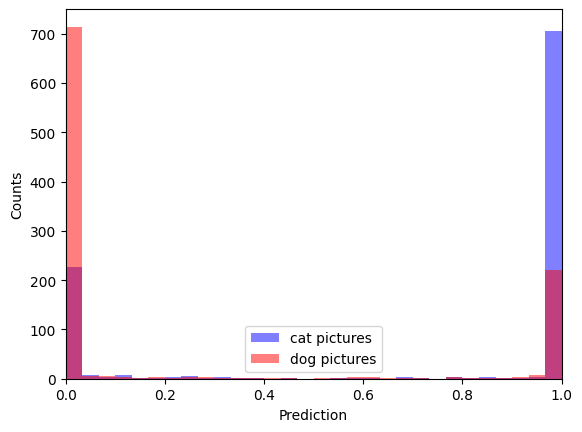

In [ ]:
plt.hist(predictions[y_test==1,0], bins=30, alpha = 0.5, lw=3, color= 'b', label="cat pictures")
plt.hist(predictions[y_test==0,0], bins=30, alpha = 0.5, lw=3, color= 'r', label="dog pictures")
plt.xlim(0,1)
plt.xlabel('Prediction')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [ ]:
history.history.keys()

dict_keys(['binary_accuracy', 'loss', 'val_binary_accuracy', 'val_loss'])

63/63 - 0s - 6ms/step - binary_accuracy: 0.7405 - loss: 5.8850


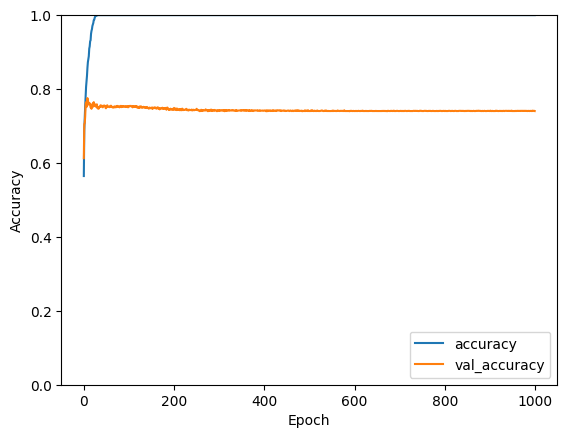

In [ ]:
#plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['binary_accuracy'], label='accuracy')
#plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.plot(history.history['val_binary_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

63/63 - 0s - 5ms/step - binary_accuracy: 0.7405 - loss: 5.8850


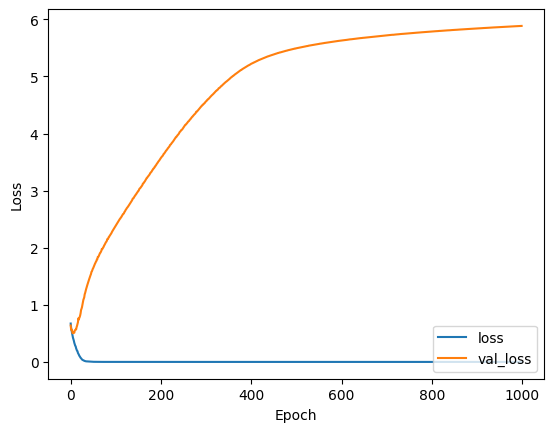

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

## Communication of Results



* Communicate the results of your analysis.



### Add Dog Photo

In [ ]:
!curl -O "https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/dog.jpg"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 60603  100 60603    0     0   318k      0 --:--:-- --:--:-- --:--:--  318k


In [ ]:
image = Image.open('dog.jpg')
print(f"Original size : {image.size}") # 5464x3640

image_resized = image.resize((100, 100))
print(f"New size : {image_resized.size}")

Original size : (300, 355)
New size : (100, 100)


In [ ]:
type(image_resized)

PIL.Image.Image

In [ ]:
img_array = np.asarray(image_resized)
img_array.shape

(100, 100, 3)

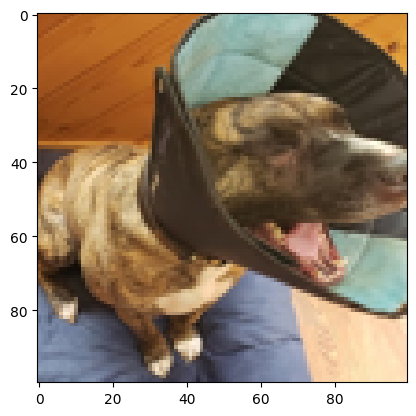

In [ ]:
plt.imshow(img_array,cmap=plt.cm.gray)
plt.show()

In [ ]:
converted = tf.image.rgb_to_grayscale(img_array)

In [ ]:
converted.shape

TensorShape([100, 100, 1])

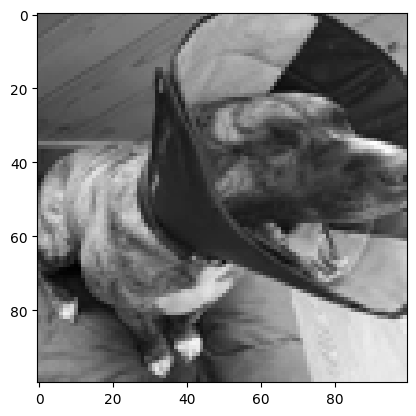

In [ ]:
plt.imshow(converted, cmap=plt.cm.gray)
plt.show()

In [ ]:
converted = np.array(converted)
converted.shape

(100, 100, 1)

In [ ]:
converted.min(), converted.max()

(np.uint8(12), np.uint8(253))

In [ ]:
#Scale data from image
converted = converted / 255

In [ ]:
# REMOVED -
# Opted to remove normalize feature option, and use the above scaling.  Produces better results
# converted = tf.keras.utils.normalize(converted, axis=1)


In [ ]:
X_test.shape

(2000, 100, 100, 1)

In [ ]:
converted.shape

(100, 100, 1)

In [ ]:
mydog = converted.reshape((1,) + converted.shape)

In [ ]:
type(mydog)


numpy.ndarray

In [ ]:
mydog.shape

(1, 100, 100, 1)

In [ ]:
predict_pic = model.predict(mydog)
print(predict_pic[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step
[9.119183e-08]


In [ ]:
# predictions = model.predict(scaled_imgs)
# print(predictions[0])

## **BONUS** (optional)



* Upload an image of your (or your friend's or family's) dog or cat and use your model to predict whether the image is a dog or cat.
* Hint: you'll probably need to convert the image from color to grayscale.  OpenCV, pillow, and other libraries are your friend.